# 3. Fundamental image process techniques - 기본적인 영상 처리 기법

## 1) Brightness control of image - 영상의 밝기 조절

<hr>

### Pixel process techniques of image - 영상의 화소 처리 기법
<hr>

- 화소 처리(Point processing)
    - 입력 영상의 특정 좌표 픽셀 값을 변경하여 출력 영상의 해당 좌표 픽셀 값으로 설정하는 연산
    - 결과 영상의 픽셀 값이 정해진 범위(e.g., 그레이스케일)에 있어야 한다.
    - 반전, 밝기 조절, 명암비 조절 등
<hr>

$$dst(x, y) = f(src(x, y))$$
$$\Bigg\uparrow$$
$$변환 함수(transfer \space function)$$
- 위 함수를 말로 해석해 보자면 입력 영상의 x, y에서의 픽셀 값(src(x, y))을 어떤 함수(f)를 거쳐감으로써 변화를 주고,<br>
그 값을 출력 영상의 x, y에서의 픽셀 값(dst(x, y))으로 하겠다.

<hr>

### Addition operation for brightness control of image - 영상의 밝기 조절을 위한 영상의 덧셈 연산
<hr>

- 밝기 조절이란
    - 영상을 전체적으로 더욱 밝거나 어둡게 만드는 연산  
<hr>

- 밝기 조절 수식
$$dst(x, y) = saturate(src(x, y) + n)$$

<hr>

> `덧셈 연산 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}add}(src1, src2, dst, mask, dtype) -> dst}$$
- src1 : 1st source. (입력) 첫 번째 영상 또는 스칼라
- src2 : 2nd source. (입력) 두 번째 영상 또는 스칼라
- dst : destination. (출력) 덧셈 연산의 결과 영상
- mask : 마스크 영상(그레이스케일)
- dtype : data type. 출력 영상(dst)의 타입. (e.g.) cv2.CV_8U, cv2.CV_32F 등
- 참고사항 :
    - 스칼라(Scalar)는 실수 값 하나 또는 실수 값 네 개로 구성된 튜플
    - dst를 함수 파라미터에 전달하려면 dst의 크기가 src1, src2와 같아야 하며, 타입이 적절해야 한다.

In [ ]:
import cv2
help(cv2.add)

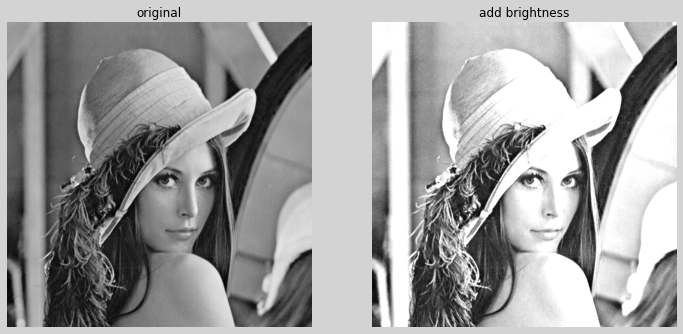

-1

In [30]:
### increase the brightness of grayscale image by 100
import cv2
import numpy as np
import matplotlib.pyplot as plt

source = cv2.imread("./images/lenna.bmp", cv2.IMREAD_GRAYSCALE)

destination = cv2.add(source, 100)  # increase the pixel values

# 각각의 엘리먼트 즉, 행렬의 원소의 값에 100을 더하는 브로드 캐스팅 형태로 동작한다.
# destination = np.clip(source + 100., 0, 255).astype(np.uint8)  # 증가 하려는 값은 실수형으로 입력한다,

plt.figure(figsize=(12, 6), facecolor="lightgray")

## pyplot으로 출력
plt.subplot(121, title="original").axis("off")
plt.imshow(source, cmap="gray")

plt.subplot(122, title="add brightness").axis("off")
plt.imshow(destination, cmap="gray")

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("original", source)
cv2.imshow("add brightness", destination)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

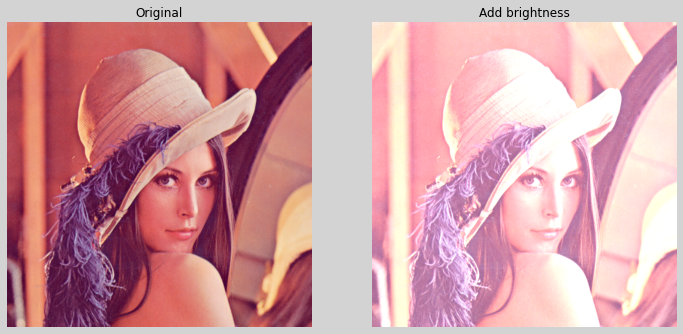

-1

In [29]:
### increase the brightness of color image by 100
import cv2
import numpy as np
import matplotlib.pyplot as plt

source = cv2.imread("./images/lenna.bmp")

# 주의사항 - 만약 컬러 영상의 밝기를 100만큼 증가시키기 위해 cv2.add() 함수의 매개변수 "src2"에 인수로
# 단일 정수 값인 100을 입력한다면 cv2.add() 함수는 자동으로 (100, 0, 0, 0)의 튜플 형태로
# 변환하여 적용시킨다. 그로 인해 해당 영상은 전체적으로 밝기가 증가하는 대신 BGRA 중 B 성분만
# 100이 증가하게 되어 출력 영상이 전체적으로 파랗게 보이게 된다.

destination = cv2.add(source, (100, 100, 100, 0))
# destination = np.clip(source + 100., 0, 255).astype(np.uint8)


## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="Original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(122, title="Add brightness").axis("off")
plt.imshow(destination[:, :, ::-1])

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Add brightness", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 2) Arithmetic & Logical operations of image - 영상의 산술 및 논리 연산

<hr>

### Addition operation[arithmetic] - 덧셈 연산(산술 연산)
<hr>

- 덧셈 연산 수식
$$dst(x, y) = saturate(src1(x, y) + src2(x, y))$$
- 두 영상의 같은 위치에 존재하는 픽셀 값을 더하여 결과 영상의 픽셀 값으로 설정한다.
- 덧셈 결과가 255보다 크면 픽셀 값을 255로 설정한다.(포화 연산, saturate operation)
<hr>

> `덧셈 연산 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}add}(src1, src2, dst, mask, dtype) -> dst}$$
- src1 : 1st source. (입력) 첫 번째 영상 또는 스칼라
- src2 : 2nd source. (입력) 두 번째 영상 또는 스칼라
- dst : destination. (출력) 덧셈 연산의 결과 영상
- mask : 마스크 영상(그레이스케일)
- dtype : data type. 출력 영상(dst)의 타입. (e.g.) cv2.CV_8U, cv2.CV_32F 등
- 참고사항 :
    - 스칼라(Scalar)는 실수 값 하나 또는 실수 값 네 개로 구성된 튜플
    - dst를 함수 파라미터에 전달하려면 dst의 크기가 src1, src2와 같아야 하며, 타입이 적절해야 한다.

<hr>

### Weighted sum[arithmetifc] - 가중치 합(산술 연산)
<hr>

- 가중치 합 수식
$$dst(x, y) = saturate(\alpha \cdot src1(x, y) + \beta\cdot src2(x, y))$$
- 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 가중합을 계산하여 결과 영상의 픽셀 값으로 설정한다.
- 보통 `α + β = 1` 이 되도록 설정 -> 두 입력 영상의 평균 밝기를 유지한다.
<hr>

### Average operation[arithmetic] - 평균 연산(산술 연산)
- 가중치를 `α = β = 0.5` 로 설정한 가중치 합
<hr>

- 평균 연산 수식
$$dst(x, y) = \frac{1}{2}(src1(x, y) + src2(x, y))$$
<hr>

> `가중치 합 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}addWeighted}(src1, alpha, arc2, beta, gamma, dst, dtype) -> dst}$$
- src1 : 1st source. 첫 번째 영상
- alpha : 첫 번째 영상 가중치
- src2 : 2nd source. 두 번째 영상. src1과 같은 크기 & 같은 타입
- beta : 두 번째 영상 가중치
- gamma : 결과 영상에 추가적으로 더할 값
- dst : destination. 가중치 합 결과 영상
- dtype : data type. 출력 영상(dst)의 타입

<hr>

### Subtract operation[arithmetic] - 뺄셈 연산(산술 연산)
<hr>

- 뺄셈 연산 수식
$$dst(x, y) = saturate(src1(x, y) - src2(x, y))$$
- 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 뺄셈 연산을 수행하여 결과 영상의 픽셀 값으로 설정한다.
- 뺄셈 결과가 0보다 작으면 픽셀 값을 0으로 설정한다.(포화 연산, saturate operation)
<hr>

> `뺄셈 연산 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}subtract}(src1, src2, dst, mask, dtype) -> dst}$$
- src1 : 1st source. 첫 번째 영상 또는 스칼라
- src2 : 2nd source. 두 번째 영상 또는 스칼라
- dst : destination. 뺄셈 연산 결과 영상
- mask : 마스크 영상(그레이스케일)
- dtype : data type. 출력 영상(dst)의 타입

<hr>

### Difference operation[arithmetic] - 차이 연산(산술 연산)
<hr>

- 차이 연산 수식
$$dst(x, y) = |src1(x, y) - src2(x, y)|$$
- 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 뺄셈 연산을 수행한 후, 그 절댓값을 결과 영상의 픽셀 값으로 설정한다.
- 뺄셈 연산과 달리 입력 영상의 순서에 영향을 받지 않는다.
<hr>

> `차이 연산 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}absdiff}(src1, src2, dst) -> dst}$$
- src1 : 1st source. 첫 번째 영상 또는 스칼라
- src2 : 2nd source. 두 번째 영상 또는 스칼라
- dst : destination. 차이 연산 결과 영상(차영상)

In [ ]:
import cv2
help(cv2.add)

In [ ]:
import cv2
help(cv2.addWeighted)

In [ ]:
import cv2
help(cv2.subtract)

In [ ]:
import cv2
help(cv2.absdiff)

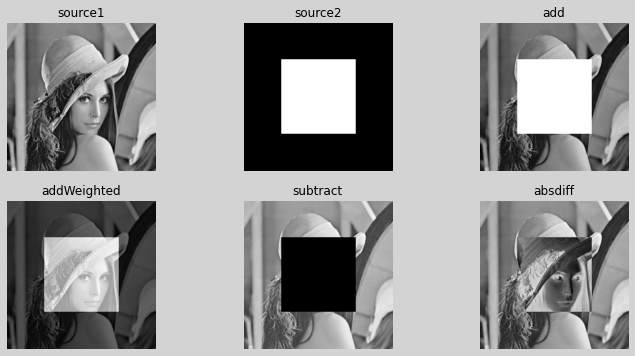

In [28]:
### practice using arithmetic operational function
import sys

import cv2
import matplotlib.pyplot as plt

source1 = cv2.imread("./images/lenna256.bmp", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("./images/square.bmp", cv2.IMREAD_GRAYSCALE)

## exception
if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()

## To use arithmetic operational functions.
destination1 = cv2.add(source1, source2, dtype=cv2.CV_8U)  # cv2.CV_8U = grayscale type
destination2 = cv2.addWeighted(source1, .5, source2, .5, 0.0)
destination3 = cv2.subtract(source1, source2)
destination4 = cv2.absdiff(source1, source2)


## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(231, title="source1").axis("off")
plt.imshow(source1, "gray")

plt.subplot(232, title="source2").axis("off")
plt.imshow(source2, "gray")

plt.subplot(233, title="add").axis("off")
plt.imshow(destination1, "gray")

plt.subplot(234, title="addWeighted").axis("off")
plt.imshow(destination2, "gray")

plt.subplot(235, title="subtract").axis("off")
plt.imshow(destination3, "gray")

plt.subplot(236, title="absdiff").axis("off")
plt.imshow(destination4, "gray")

plt.show()

<hr>

### Bitwise AND, OR, XOR, NOT operations[Logical] - 비트 단위 연산(논리 연산)
<hr>

> `비트단위 연산 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}bitwise\_and}(src1, src2, dst, mask) -> dst}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}bitwise\_or}(src1, src2, dst, mask) -> dst}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}bitwise\_xor}(src1, src2, dst, mask) -> dst}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}bitwise\_not}(src, dst, mask) -> dst}$$

- src1 : 1st source. 첫 번째 영상 또는 스칼라
- src2 : 2nd source. 두 번째 영상 또는 스칼라
- dst : destination. 출력 영상
- mask : 마스크 영상(그레이스케일)
- 참고사항
    - 각각의 픽셀 값을 이진수로 표현하고, 비트(bit) 단위 논리 연산을 수행한다.

In [ ]:
import cv2
help(cv2.bitwise_and)

In [ ]:
import cv2
help(cv2.bitwise_or)

In [ ]:
import cv2
help(cv2.bitwise_xor)

In [ ]:
import cv2
help(cv2.bitwise_not)

## 3) Color image & Color space - 컬러 영상과 색 공간

<hr>

### Color image for OpenCV - OpenCV 컬러 영상
- 컬러 영상은 3차원 `numpy.ndarray`로 표현한다. `img.shape = (h, w, 3)`
- OpenCV에서는 RGB 순서가아니라 `BGR` 순서를 기본으로 사용한다.
<hr>

- OpenCV에서 컬러 영상 다루기
    - `image1 = cv2.imread("lenna.bmp", cv2.IMREAD_COLOR)`
    - `image2 = np.zeros((480, 640, 3), np.uint8)`
    - `image3 = cv2.imread("lenna.bmp", cv2.IMREAD_GRAYSCALE)`
    - `image4 = cv2.cvtColor(image3, cv2.COLOR_GRAY2BGR)`
        - `image4`의 경우 영상의 각 픽셀은 B, G, R 색 성분 값이 모두 같게 설정된다.<br>
색상은 변경되지 않고 그대로 유지한 채 1채널에서 3채널로 변경된다.<br>
(i.e.) 1 byte by pixel to 3 bytes by pixel
<hr>

- RGB 색 공간
    - 빛의 삼원색인 빨간색(R), 녹색(G), 파란색(B)을 혼합하여 색상을 표현 한다.(가산 혼합, Additive Color Mixing)
    - TV & 모니터, 카메라 센서 Bayer 필터, 비트맵

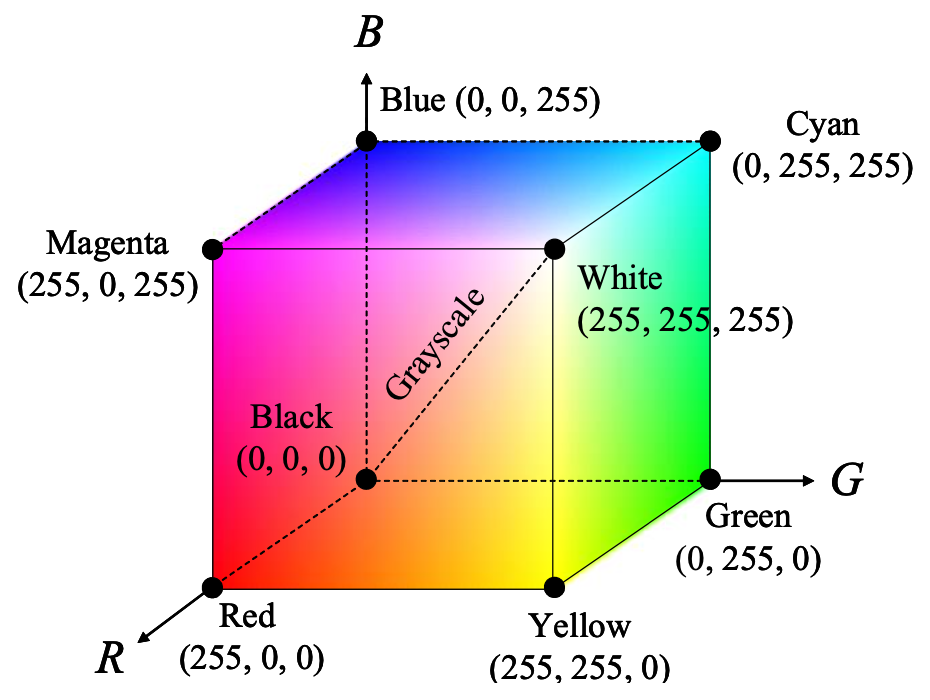

In [ ]:
from IPython.display import Image
Image("./images/color_space.png")  # color space

<hr>

### Separate & Combine of color channels - 색상 채널의 분리 & 결합
<hr>

> `(색상) 채널 분리 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}split}(m, mv) -> dst}$$
- m : matrix. 다채널 영상. (e.g.) (B, G, R)로 구성된 컬러 영상
- mv : matrix of vector. 출력 영상
- dst : destination. 출력 영상의 리스트
<hr>

> `(색상) 채널 결합 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}merge}(mv, dst) -> dst}$$
- mv : matrix of vector. 입력 영상 리스트 또는 튜플
- dst : destination. 출력 영상

In [ ]:
import cv2
help(cv2.split)

In [ ]:
import cv2
help(cv2.merge)

source.shape : (480, 640, 3)
source.dtype : uint8


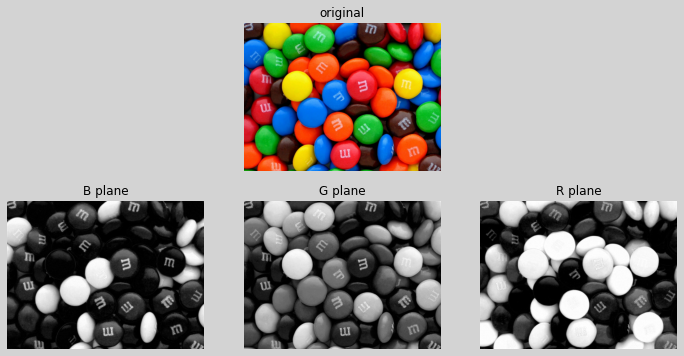

-1

In [27]:
### displaying RGB color information in each planes
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/candies.png")

## check attributes of color image
print("source.shape :", source.shape)  # (480, 640, 3)
print("source.dtype :", source.dtype)  # uint8 - 8bit Unsigned Integer

## how to numpy slicing
# blue_plane = source[:, :, 0]
# green_plane = source[:, :, 1]
# red_plane = source[:, :, 2]

## saperate the planes into each with multiple variables
# blue_plane, green_plane, red_plane = cv2.split(source)

# 위 두가지 방법은 변수가 3개가 되어 관리가 상대적으로 힘들다는 단점이 있다.
# 일단 분할한 후 하나의 변수에 할당하여 인덱싱으로 호출하는 것이 좀 더 효율적으로 보인다.
planes = cv2.split(source)  # saperate the BGR planes into each


## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(232, title="original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(234, title="B plane").axis("off")
plt.imshow(planes[0], "gray")

plt.subplot(235, title="G plane").axis("off")
plt.imshow(planes[1], "gray")

plt.subplot(236, title="R plane").axis("off")
plt.imshow(planes[2], "gray")

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("original", source)
cv2.imshow("B plane", planes[0])
cv2.imshow("G plane", planes[1])
cv2.imshow("R plane", planes[2])

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Color space conversion - 색 공간 변환
- 영상 처리에서는 특정한 목적을 위해 RGB 색 공간을 HSV, YCrCb, Grayscale 등의 다른 색 공간으로 변환하여 처리한다.
- OpenCV 색 공간 변환 방법
    - [OpenCV 문서 페이지](https://docs.opencv.org/master/de/d25/imgproc_color_conversions.html) 참고
<hr>

> `색 공간 변환 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}cvtColor}(src, code, dst, dstCn) -> dst}$$
- src : source. 입력 영상
- code : 색 변환 코드 ([OpenCV 문서 페이지](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0) 참고)
- dstCn : 결과 영상의 채널 수. 0이면 자동 결정된다. 기본값은 0
- dst : 출력 영상
<hr>

- RGB 색상을 그레이스케일로 변환하는 수식
$$Y = 0.299R + 0.587G + 0.114B$$
- RGB 순서로 약 3:6:1의 비율로 계산되는 것을 확인할 수 있다.
- 장점 : 데이터 저장 용량 감소, 데이터 처리 속도 향상
- 단점 : 색상 정보 손실

In [ ]:
import cv2
help(cv2.cvtColor)

<hr>

### HSV(Hue, Saturation, Value) - 색상, 채도, 명도
<hr>

- HSV 색 공간
    - Hue : 색상, 색의 종류. 색상 정보를 각도로써 표현한다. (0˚ ~ 360˚)
    - Saturation : 채도, 색의 탁하고 선명한 정도
    - Value : 명도, 빛의 밝기
<hr>

- HSV 값 범위
    - cv2.CV_8U(8비트 부호 없는) 영상의 경우
        - 0 ≤ H ≤ 179
        - 0 ≤ S ≤ 255
        - 0 ≤ V ≤ 255
    - cv2.CV_32F(32비트 부동소수형) 영상의 경우
        - 0 ≤ H ≤ 360
        - 0 ≤ S ≤ 255 or 0 ≤ S ≤ 1
        - 0 ≤ V ≤ 255 or 0 ≤ S ≤ 1

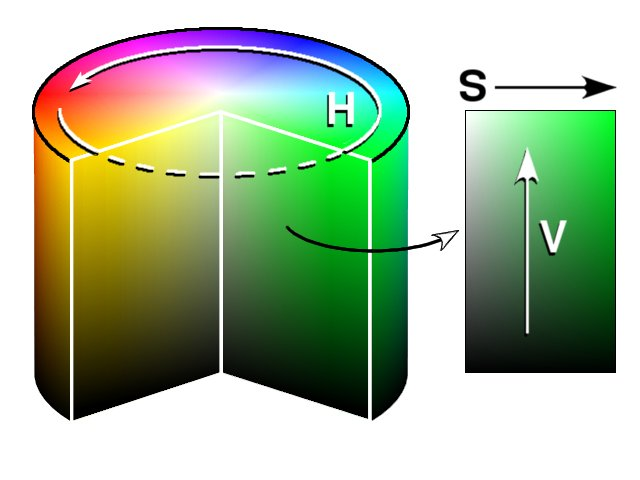

In [ ]:
from IPython.display import Image
Image("./images/HSV_cylinder.jpg")  # HSV cylinder

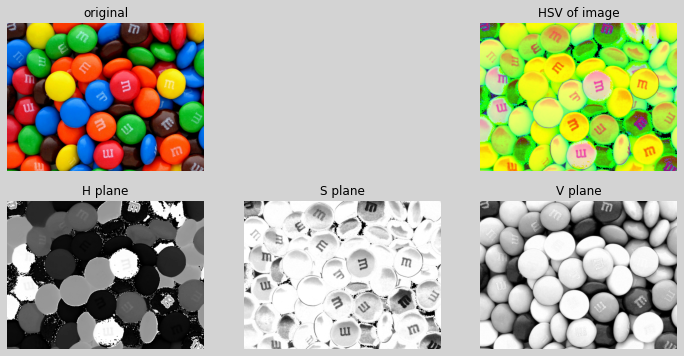

-1

In [26]:
### displaying HSV color information in each planes
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/candies.png")
source_HSV = cv2.cvtColor(source, cv2.COLOR_BGR2HSV)

planes = cv2.split(source_HSV)  # saperate the HSV planes into each


## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(231, title="original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(233, title="HSV of image").axis("off")
plt.imshow(source_HSV[:, :, ::-1])

plt.subplot(234, title="H plane").axis("off")
plt.imshow(planes[0], "gray")

plt.subplot(235, title="S plane").axis("off")
plt.imshow(planes[1], "gray")

plt.subplot(236, title="V plane").axis("off")
plt.imshow(planes[2], "gray")

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("original", source)
cv2.imshow("HSV of image", source_HSV)
cv2.imshow("H plane", planes[0])
cv2.imshow("S plane", planes[1])
cv2.imshow("V plane", planes[2])

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### YCrCb(Luminance, Chrominance) - 휘도, 색차
- OpenCV에서 제공하는 색 변환 코드는 YCbCr이 아니라 YCrCb로 되어 있다.
<hr>

- YCrCb 색 공간
    - PAL, NTSC, SECAM 등의 컬러 비디오 표준에 사용되는 색 공간
    - 영상의 밝기 정보와 색상 정보를 따로 분리하여 부호화 (흑백 TV 호환)
    - Y : 밝기 정보(luma), 그레이스케일 영상과 동일한 평면
    - Cr, Cb : 색차(chroma)
<hr>

- YCrCb 값 범위
    - cv2.CV_8U(8비트 부호 없는) 영상의 경우
    - 0 ≤ Y ≤ 255
    - 0 ≤ Cr ≤ 255
    - 0 ≤ Cb ≤ 255
<hr>

- YUV / Y′UV / YCbCr 의 차이 - `출처` : [YUV, 위키백과](https://ko.wikipedia.org/wiki/YUV)
    - Y′는 루마 컴포넌트(밝기)를 대표하며 U와 V는 크로미넌스(색) 컴포넌트를 대표한다.<br>
휘도는 Y로 나타내며 루마는 Y′로 나타낸다. 프라임 부호(′)는 감마 압축을 나타내며<br>
여기서 휘도는 물리적인 선형 공간 밝기를 의미하고 루마는 (비선형) 지각 밝기를 의미한다.
    - Y′UV, YUV, YCbCr, YPbPr 등의 용어의 범위가 모호하고 겹치는 부분이 있다. 역사적으로 `YUV`와 `Y'UV`는<br> 
방송 시스템의 색 정보의 특정 "`아날로그 인코딩`"용으로 사용된 반면 `YCbCr`은 비디오 및 스틸 이미지 압축과 전송<br>
(예: MPEG, JPEG)에 적합한 색 정보의 `디지털 인코딩`에 사용되었다.<br>
오늘날 `YUV`라는 용어는 `YCbCr`을 사용하여 인코딩되는 파일 포맷을 기술하기 위해 컴퓨터 산업에서 흔히 사용되고 있다.
<hr>

- YCbCr / YPbPr 의 차이 - `출처` : [YCbCr, 위키백과](https://ko.wikipedia.org/wiki/YCbCr)
    - YCbCr은 영상 시스템에서 사용되는 색공간의 일종이다. Y 는 휘도 성분이며 Cb 와 Cr 은 색차 성분이다.<br>
    YCbCr 은 가끔 YCC 라고 줄여 부르기도 한다. YCbCr 은 절대 색공간 이 아니며 RGB 정보를 인코딩하는<br>
    방식의 하나로, 실제로 보이는 이미지의 색은 신호를 디스플레이 하기 위해 사용된 원본 RGB 정보에 의존한다.
    - (신호를 디지털 형식으로 변경하기 위해 스케일링과 오프셋 조정 단계를 거치기 이전의) YCbCr 신호는<br>
    YPbPr 이라고 하며, 이것은 감마 보정된 RGB 원본 영상에서 Kb 와 Kr 이라는 두가지 상수를 이용하여<br>
    다음과 같은 공식을 통해 얻을 수 있다.
$$Y^\prime = K_R · R^\prime + K_G · G^\prime + K_B · B^\prime$$
$$P_B = \frac{1}{2} · \frac{B^\prime - Y^\prime}{1 - K_B}$$
$$P_R = \frac{1}{2} · \frac{R^\prime - Y^\prime}{1 - K_R}$$
<hr>

- NOTE : 아직 완벽하게 이해가 가지 않는다. 그럼 OpenCV에서 제공하는 색 변환 코드에 YUV는 언제 쓰는거지..

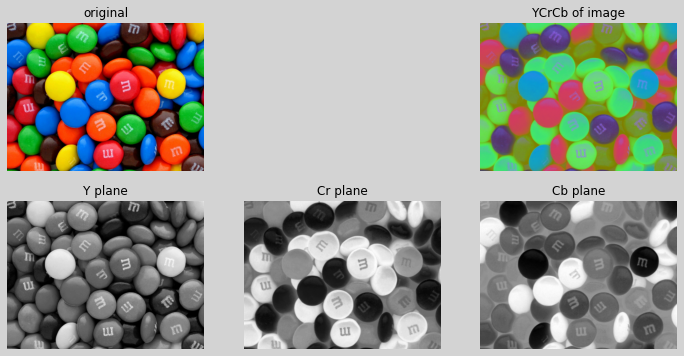

-1

In [25]:
### displaying YCrCb color information in each planes
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/candies.png")
source_YCrCb = cv2.cvtColor(source, cv2.COLOR_BGR2YCrCb)

planes = cv2.split(source_YCrCb)


## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(231, title="original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(233, title="YCrCb of image").axis("off")
plt.imshow(source_YCrCb[:, :, ::-1])

plt.subplot(234, title="Y plane").axis("off")
plt.imshow(planes[0], "gray")  # 그레이스케일 영상과 동일

plt.subplot(235, title="Cr plane").axis("off")
plt.imshow(planes[1], "gray")

plt.subplot(236, title="Cb plane").axis("off")
plt.imshow(planes[2], "gray")
plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("source", source)
cv2.imshow("source_YCrCb", source_YCrCb)
cv2.imshow("Y_plane", planes[0])
cv2.imshow("Cr_plane", planes[1])
cv2.imshow("Cb_plane", planes[2])

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 4) Histogram analysis - 히스토그램 분석
<hr>

- Histogram - 데이터의 분포도
    - 통계학에서 어떠한 데이터의 분포를 그래프의 형태로 표현하는 방법
    - 영상처리에서는 영상의 픽셀 값 분포를 그래프의 형태로 표현한 것
    - (e.g.) 그레이스케일 영상에서 각 그레이스케일 값에 해당하는 픽셀의 개수를 구하고, 이를 막대 그래프의 향태로 표현한다.
<hr>

- 히스토그램 수식
$$h(g) = N_g$$
<hr>

- 정규화된 히스토그램(Normalized histogram)
    - 각 픽셀의 개수를 영상 전체 픽셀 개수로 나누어준 것
    - 해당 그레이스케일 값을 갖는 픽셀이 나타날 `확률`
<hr>

- 정규화 수식
$$p(g) = \frac{N_g}{w\times h} \Rrightarrow \sum_{g=0}^{L-1} p(g) = 1$$
<hr>

> `히스토그램 구하기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}calcHist}(images, channels, mask, histSize, ranges, hist, accumulate) -> hist}$$
- images : 입력 영상 리스트
- channels : 히스토그램을 구할 채널을 나타내는 리스트
    - [0] : grayscale
    - [0, 1, 2] : 순서대로 B, G, R
    - (e.g.) 컬러 영상에서 B, R 채널에 대해서만 히스토그램을 구하고 싶다면 [0, 2]로 지정한다.
- mask : 마스크 영상. 입력 영상 전체에서 히스토그램을 구하려면 `None`지정
- histSize : 히스토그램 각 차원의 크기(빈(bin)의 개수)를 나타내는 리스트
    - (e.g.) 그레이스케일 영상의 히스토그램을 구할 때, 보통 차원의 크기로는 256(0 ~ 255)을 지정한다.<br>
그렇지만 만약에 반값인 128로 지정한다면 `256 / 128 = 2`를 한 세트로하여 히스토그램을 구한다.
    - (i.e.) 정리하자면 `histSize 에 전달한 값에 따라 차원의 크기 / 전달값`을 하나의 `bin`으로 한다.
- ranges : 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트
    - (i.e.) 영상에서 측정하려는 픽셀값의 범위로써, 특정 픽셀값 영역에 대해서만 분석하게 할 수도 있다.<br>
리스트를 작성하는 방법으로는 지정한 채널의 순서대로 [0, 256, 0, 256]의 형태로 최소/최대값을 지정한다.
- hist : 계산된 히스토그램(`numpy.adarray`)
- accumulate : 기존의 hist 히스토그램에 누적하려면 True, 새로 만들려면 False(기본값)
<hr>

- bin
    - 통상, 뚜껑이 달린 통, 저장 용기(저장소) 등을 가리키는 말
    - 또한, 균일 간격의 분할을 의미하기도 함

In [ ]:
import cv2
help(cv2.calcHist)

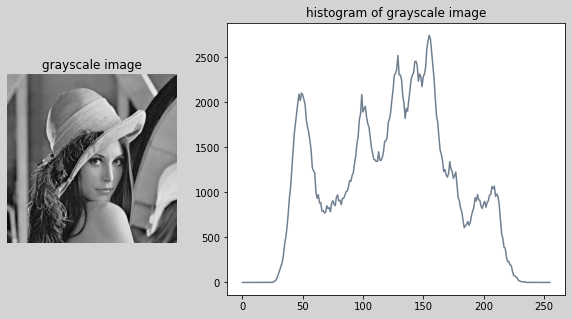

In [24]:
### Get histogram of grayscale image
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/lenna.bmp", cv2.IMREAD_GRAYSCALE)

histogram = cv2.calcHist([source], [0], None, [256], [0, 256])  # Get histogram

## pyplot으로 출력
plt.figure(figsize=(10, 5), facecolor="lightgray")
gridspec = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

plt.subplot(gridspec[0], title="grayscale image").axis("off")
plt.imshow(source, "gray")

plt.subplot(gridspec[1], title="histogram of grayscale image")
plt.plot(histogram, color="SlateGray")

plt.show()

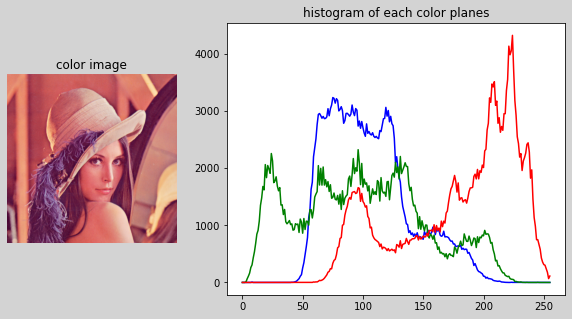

In [23]:
### Get histogram of color image
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/lenna.bmp")

colors = ["b", "g", "r"]  # Color image channels
BGR_planes = cv2.split(source)  # List of color planes

## pyplot으로 출력
plt.figure(figsize=(10, 5), facecolor="lightgray")
gridspec = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

plt.subplot(gridspec[0], title="color image").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(gridspec[1], title="histogram of each color planes")
for (plane, color_) in zip(BGR_planes, colors):
    histogram = cv2.calcHist([plane], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color_)

plt.show()

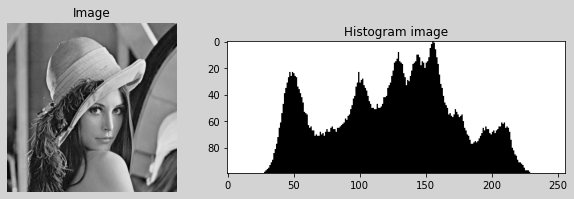

-1

In [22]:
### Indicate histogram of grayscale image with OpenCV drawing function
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_gray_hist_image(histogram):  # Make histogram into image using OpenCV drawing function
    image_hist = np.full((100, 256), 255, dtype=np.uint8)
    
    hist_max = np.max(histogram)
    for x in range(256):
        point1 = (x, 100)
        point2 = (x, 100 - int(histogram[x, 0] * 100 / hist_max))  # 0 ≤ x ≤ 255, 0 ≤ y ≤ 100
        cv2.line(image_hist, point1, point2, 0)
    
    return image_hist

source = cv2.imread("./images/lenna.bmp", cv2.IMREAD_GRAYSCALE)

histogram_ = cv2.calcHist([source], [0], None, [256], [0, 256])  # Get histogram

histogram_output = get_gray_hist_image(histogram_)  # Get histogram image

## pyplot으로 출력
plt.figure(figsize=(10, 5), facecolor="lightgray")
gridspec = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

plt.subplot(gridspec[0], title="Image").axis("off")
plt.imshow(source, "gray")

plt.subplot(gridspec[1], title="Histogram image")
plt.imshow(histogram_output, "gray")

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow('Image', source)
cv2.imshow('Histogram image', histogram_output)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 5) Contrast control of images - 영상의 명암비 조절
<hr>

- 명암비(Contrast)란
    - 밝은 곳과 어두운 곳 사이에 드러나는 밝기 정도의 차이
    - 대비(對比) 또는 콘트라스트(contrast)는 물체를 다른 물체와 배경과 구별할 수 있게 만들어 주는<br>
시각적인 특성의 차이를 말한다. 실생활의 시각에서 대비는 같은 시야 속에서 한 물체와<br>
다른 물체의 색과 밝기의 차이로 결정된다.
        - `출처` : [대비, 위키백과](https://ko.wikipedia.org/wiki/%EB%8C%80%EB%B9%84_(%EA%B7%B8%EB%A6%BC))
<hr>

- 기본적인 명암비 조절 함수(수식)
$$dst(x, y) = saturate(s · src(x, y))$$
<hr>

- 효과적인 명암비 조절 함수(수식)
$$dst(x, y) = saturate(src(x, y) + (src(x, y) - 128) · \alpha)$$
$$\bigg\Downarrow$$
$$\begin{align}
dst(x, y) & = src(x, y) + (src(x, y) - 128) · \alpha \\ 
& = src(x, y) + srx(x, y) · \alpha - 128 · \alpha \\ 
& = (1 + \alpha) · src(x, y) - 128 · \alpha \\ 
& = {\color{RoyalBlue}saturate((1 + \alpha) · src(x, y) - 128 · \alpha)}
\end{align}$$

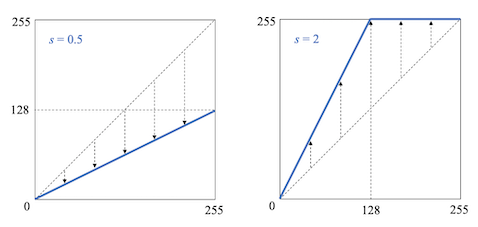

In [6]:
from IPython.display import Image
Image("./images/contrast_function2.png")  # basic contrast control function

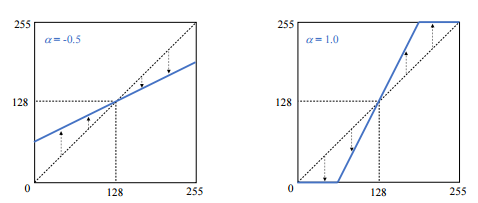

In [4]:
from IPython.display import Image
Image("./images/contrast_function1.png")  # effective contrast control function

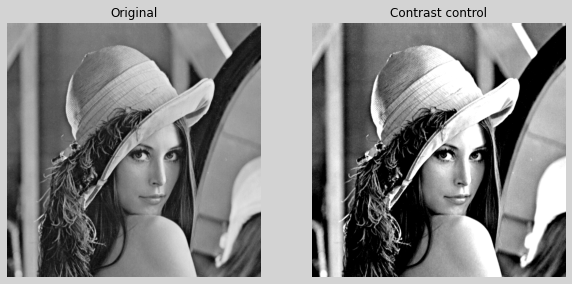

-1

In [21]:
### Example for basic contrast control
import cv2
import matplotlib.pyplot as plt
import numpy as np

ALPHA = 1.0  # Gradient constant

source = cv2.imread("./images/lenna.bmp", cv2.IMREAD_GRAYSCALE)

destination = np.clip((1 + ALPHA)*source - 128*ALPHA, 0, 255).astype(np.uint8)  # Manually contrast control

## pyplot으로 출력
plt.figure(figsize=(10, 5), facecolor="lightgray")

plt.subplot(121, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(122, title="Contrast control").axis("off")
plt.imshow(destination, "gray")

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Contrast control", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Histogram stretching - 히스토그램 스트레칭
<hr>

- 영상의 히스토그램이 그레이스케일 전 구간에서 걸쳐 나타나도록 변경하는 선형 변환 기법
<hr>

> `정규화 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}normalize}(src, dst, alpha, beta, norm_type, dtype, mask) -> dst}$$
- src : source. 입력 영상
- dst : destination. 결과 영상
- alpha : (노름 정규화인 경우) 목표 노름 값,<br>
(원소 값 범위 정규화인 경우) 최솟값
- beta : (원소 값 범위 정규화인 경우) 최댓값
- norm_type : normalization type. 정규화 타입
    - NORM_INF, NORM_L1, NORM_L2, NORM_MINMAX
- dtype : data type. 결과 영상의 타입
- mask : 마스크 영상
<hr>

- 히스토그램 스트레칭 변환 함수
    - 변환 함수의 직선의 방정식 구하기

$$gradient : \frac{255}{G_{max} - G_{min}}$$
$$y \space intercept : - \frac{255\times G_{min}}{G_{max} - G_{min}}$$
$$\begin{align} 
g(x, y) & = \frac{255}{G_{max} - G_{min}}\times f(x, y) - \frac{255\times G_{min}}{G_{max} - G_{min}} \\ 
& = \frac{f(x, y) - G_{min}}{G_{max} - G_{min}}\times 255 \\ 
\end{align}$$
<hr>

- 변환 함수의 직선의 방정식 요약
$$\begin{align}
g(x) & = a · f(x) - b \\
a & = gradient \\
b & = y \space intercept \\
\end{align}$$

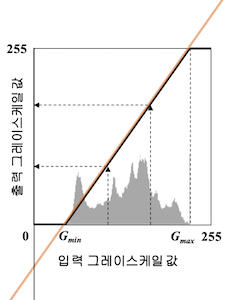

In [3]:
from IPython.display import Image
Image("./images/histogram_stretching.png")  # histogram stretching transfer function

In [ ]:
import cv2
help(cv2.normalize)

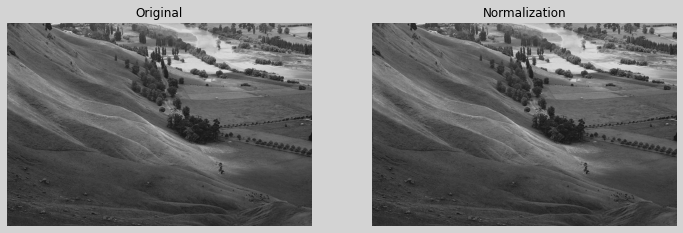

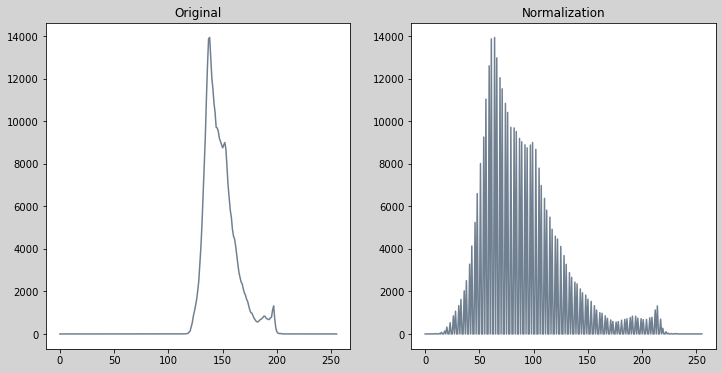

-1

In [17]:
### contrast automatic control using histogram stretching
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("./images/Hawkes.jpg", cv2.IMREAD_GRAYSCALE)

destination = cv2.normalize(source, None, 0, 255, cv2.NORM_MINMAX)


## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(122, title="Normalization").axis("off")
plt.imshow(destination, "gray")

plt.show()

## get histogram
histogram_source = cv2.calcHist([source], [0], None, [256], [0, 256])
histotram_normalization = cv2.calcHist([destination], [0], None, [256], [0, 256])

## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="Original")
plt.plot(histogram_source, color="SlateGray")

plt.subplot(122, title="Normalization")
plt.plot(histotram_normalization, color="SlateGray")

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Normalization", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

#### NOTE : 정규화 전후 모습이 matplotlib으로 출력했을 때는 티가 잘 안 난다.
#### 히스토그램을 만들어보니 정규화 작업은 재대로 된 듯 하다.
#### 참고로 OpenCV 가상 윈도우에서는 확연하게 차이가 나게 출력된다.
#### When the before and after normalization is output with matplotlib, it is not very noticeable.
#### But it seems that the normalization works well when i saw the histogram.
#### For reference, the normalization output is clearly different in the OpenCV virtual window.

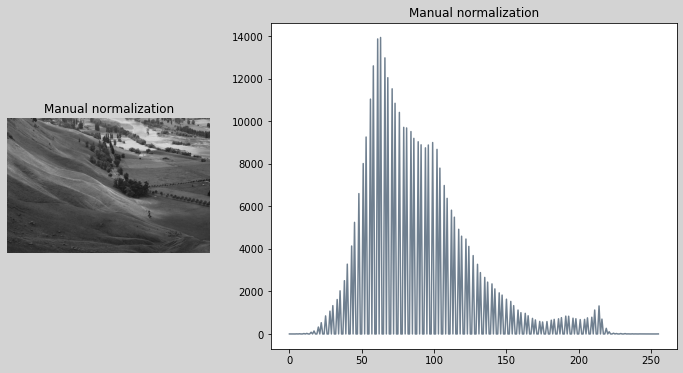

In [18]:
### manually normalize
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("./images/Hawkes.jpg", cv2.IMREAD_GRAYSCALE)

G_min, G_max, _, _ = cv2.minMaxLoc(source)  # get bins min & max
normalization = np.clip((source - G_min) * 255. / (G_max - G_min), 0, 255).astype(np.uint8)

histogram_normalization = cv2.calcHist([normalization], [0], None, [256], [0, 256])  # get histogram

## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")
gridspec = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

plt.subplot(gridspec[0], title="Manual normalization").axis("off")
plt.imshow(normalization, "gray")

plt.subplot(gridspec[1], facecolor="white", title="Manual normalization")
plt.plot(histogram_normalization, color="SlateGray")

plt.show()

## 6) Histogram equalization - 히스토그램 평활화
<hr>

- 히스토그램이 그레이스케일 전체 구간에서 균일한 분포로 나타나도록 변경하는 명암비 향상 기법
- 히스토그램 균등화, 균일화, 평탄화라고도 한다.
<hr>

- 히스토그램 평활화를 위한 변환 함수 구하기(수식)
$$\cdot\space histogram\space function : h(g) = N_g$$
$$\cdot\space normalized\space histogram\space function : p(g) = \frac{h(g)}{w\times h}$$
$$\cdot\space cumulative\space distribution\space function : cdf(g) = \textstyle \sum_{0\le i < g} p(i)$$
$$\cdot\space tranfer\space function : dst(x, y) = round(cdf(src(x, y))\times L_{max})$$
<hr>

> `히스토그램 평활화 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}equalizeHist}(src, dst) -> dst}$$
- src : source. 입력 영상(그레이스케일 영상)
- dst : destination. 결과 영상

In [ ]:
import cv2
help(cv2.equalizeHist)

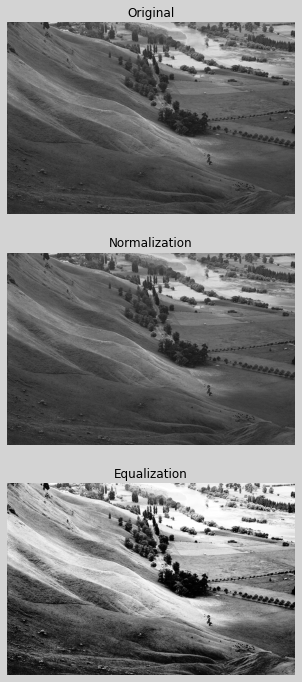

-1

In [19]:
### equalize histogram
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("./images/Hawkes.jpg", cv2.IMREAD_GRAYSCALE)

normalization = cv2.normalize(source, None, 0, 255, cv2.NORM_MINMAX)
equalization = cv2.equalizeHist(source)

## pyplot으로 출력
plt.figure(figsize=(6, 12), facecolor="lightgray")

plt.subplot(311, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(312, title="Normalization").axis("off")
plt.imshow(normalization, "gray")

plt.subplot(313, title="Equalization").axis("off")
plt.imshow(equalization, "gray")

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Normalization", normalization)
cv2.imshow("Equalization", equalization)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

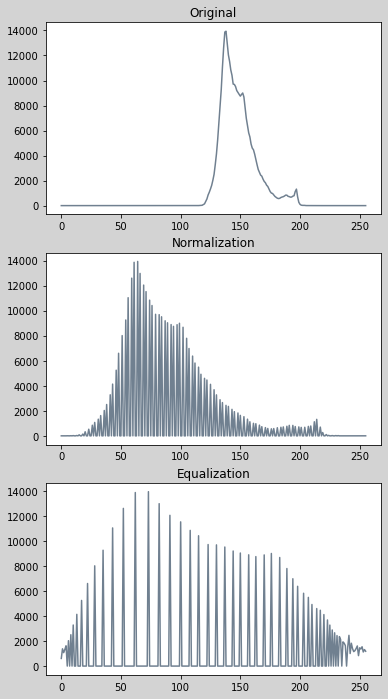

-1

In [20]:
### histogram compare to each of cases
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/Hawkes.jpg", cv2.IMREAD_GRAYSCALE)

normalization = cv2.normalize(source, None, 0, 255, cv2.NORM_MINMAX)
equalization = cv2.equalizeHist(source)

## get histogram
source_histogram = cv2.calcHist([source], [0], None, [256], [0, 256])
normal_histogram = cv2.calcHist([normalization], [0], None, [256], [0, 256])
equal_histogram = cv2.calcHist([equalization], [0], None, [256], [0, 256])

## pyplot으로 출력
plt.figure(figsize=(6, 12), facecolor="lightgray")

plt.subplot(311, title="Original")
plt.plot(source_histogram, color="SlateGray")

plt.subplot(312, title="Normalization")
plt.plot(normal_histogram, color="SlateGray")

plt.subplot(313, title="Equalization")
plt.plot(equal_histogram, color="SlateGray")

plt.show()

def get_gray_hist_image(histogram):
    """Return a histogram image
    
    Make histogram into image using OpenCV drawing function."""
    
    image_hist = np.full((100, 256), 255, dtype=np.uint8)
    
    hist_max = np.max(histogram)
    for x in range(256):
        point1 = (x, 100)
        point2 = (x, 100 - int(histogram[x, 0] * 100 / hist_max))  # 0 ≤ x ≤ 255, 0 ≤ y ≤ 100
        cv2.line(image_hist, point1, point2, 0)
    
    return image_hist

## get histogram image
source_histogram_image = get_gray_hist_image(source_histogram)
normal_histogram_image = get_gray_hist_image(normal_histogram)
equal_histogram_image = get_gray_hist_image(equal_histogram)

## OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source_histogram_image)
cv2.imshow("Normalization", normal_histogram_image)
cv2.imshow("Equalization", equal_histogram_image)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Histogram equalization for color image - 컬러 영상의 히스토그램 평활화
<hr>

- 직관적 방법 : R, G, B 각 색 평면에 대해 히스토그램 평활화를 한다.
$$
(input)color\space image
\begin{Bmatrix}
R &\to \space histogram\space equalization &\to R_{E} \\ 
G &\to \space histogram\space equalization &\to G_{E} \\
B &\to \space histogram\space equalization &\to B_{E}
\end{Bmatrix}
(output)color\space image
$$
- 밝기 성분에 대해서만 히스토그램 평활화를 수행(색상 성분은 불변)
$$
(input)color\space image
\begin{Bmatrix}
Y &\to \space histogram\space equalization &\to Y_{E} \\ 
Cr & \space \longrightarrow & Cr \\
Cr & \space \longrightarrow & Cb
\end{Bmatrix}
(output)color\space image
$$
<hr>



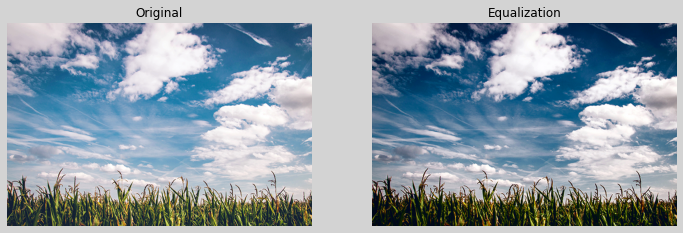

In [11]:
### Histogram equalization of color image
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/field.bmp")

source_YCrCb = cv2.cvtColor(source, cv2.COLOR_BGR2YCrCb)
source_YCrCb[:, :, 0] = cv2.equalizeHist(source_YCrCb[:, :, 0])  # Equalize only Y

destination = cv2.cvtColor(source_YCrCb, cv2.COLOR_YCrCb2BGR)

## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="Original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(122, title="Equalization").axis("off")
plt.imshow(destination[:, :, ::-1])

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Equalization", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

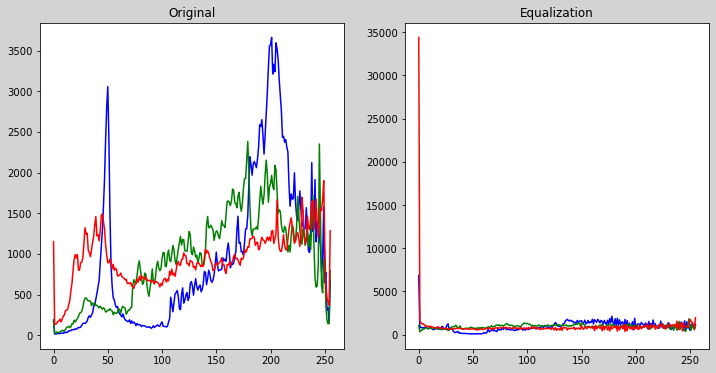

In [10]:
### Get histogram of color image
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/field.bmp")
source_YCrCb = cv2.cvtColor(source, cv2.COLOR_BGR2YCrCb)

source_planes = cv2.split(source)

## Equalize only Y plane, Conversion to BGR and then Saperate the "destination" planes into each.
source_YCrCb[:, :, 0] = cv2.equalizeHist(source_YCrCb[:, :, 0])  # Equalize only Y
destination = cv2.cvtColor(source_YCrCb, cv2.COLOR_YCrCb2BGR)
destination_planes = cv2.split(destination)

## Get histogram & pyplot으로 출력
colors = ["b", "g", "r"]  # Each color of planes

plt.figure(figsize=(12, 6), facecolor="lightgray")

# Original color image histogram
plt.subplot(121, title="Original")
for (plane, color_) in zip(source_planes, colors):
    histogram = cv2.calcHist([plane], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color_)

# Equalized color image histogram
plt.subplot(122, title="Equalization")
for (plane, color_) in zip(destination_planes, colors):
    histogram = cv2.calcHist([plane], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color_)
    
plt.show()

## 7) Extract a specific color gamut - 특정 색상 영역 추출
<hr>

> `특정 범위 안에 있는 행렬 원소를 검출해주는 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}inRange}(src, lowerb, upperb, dst) -> dst}$$
- src : source. 입력 행렬
- lowerb : lower boundary. 하한 값 행렬 또는 스칼라
- upperb : upper boundary. 상한 값 행렬 또는 스칼라
- dst : destination. 입력 영상과 같은 크기의 마스크 영상(numpy.uint8)<br>
ROI의 픽셀은 255, 나머지 0인 이진 영상으로 설정한다.
$$\cdot\space single\space channel:dst(I)=lowerb(I)_{0}\le src(I)_{0}\le upperb(I)_{0}$$
$$\begin{align}\cdot\space multi\space channels:dst(I)=&\space lowerb(I)_{0}\le src(I)_{0}\le upperb(I)_{0}\land \\ 
&\space lowerb(I)_{1}\le src(I)_{1}\le upperb(I)_{1}\land \\ 
&\space\dots\end{align}$$

In [ ]:
help(cv2.inRange)

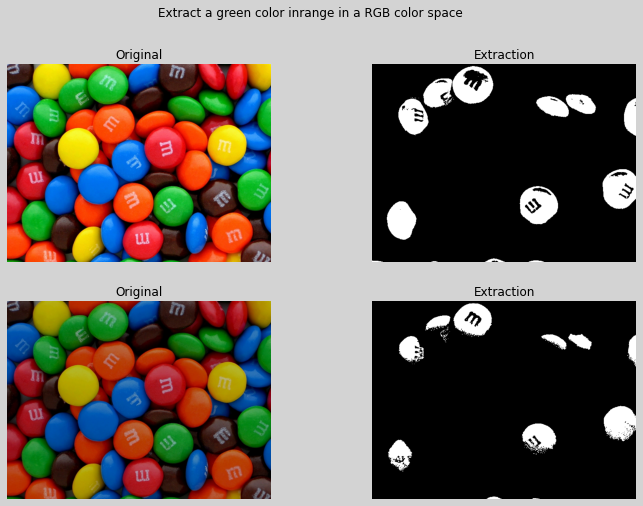

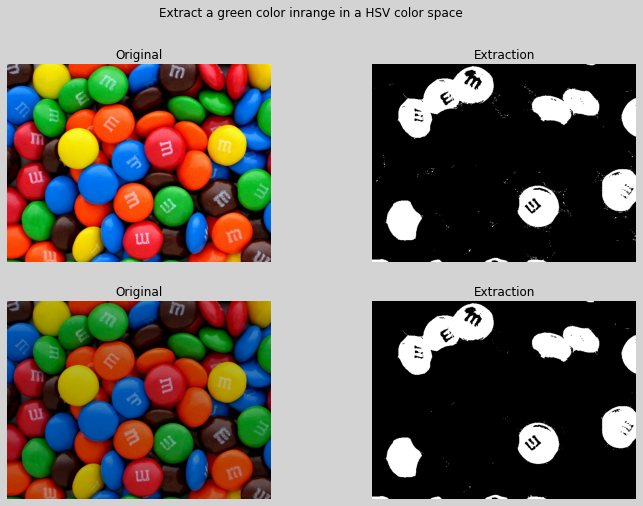

-1

In [9]:
### extract a green color inrange in a RGB & HSV color space
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/candies.png")
source2 = cv2.imread("./images/candies2.png")

destination = cv2.inRange(source, (0, 128, 0), (100, 255, 100))
destination2 = cv2.inRange(source2, (0, 128, 0), (100, 255, 100))

destination_HSV = cv2.inRange(
    src=cv2.cvtColor(source, cv2.COLOR_BGR2HSV),
    lowerb=(50, 150, 0), upperb=(80, 255, 255)
)
destination2_HSV = cv2.inRange(
    src=cv2.cvtColor(source2, cv2.COLOR_BGR2HSV),
    lowerb=(50, 150, 0), upperb=(80, 255, 255)
)

## pyplot으로 출력
plt.figure(figsize=(12, 8), facecolor="lightgray")
plt.suptitle("Extract a green color inrange in a RGB color space")  # main title

plt.subplot(221, title="Original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(222, title="Extraction").axis("off")
plt.imshow(destination, "gray")

plt.subplot(223, title="Original").axis("off")
plt.imshow(source2[:, :, ::-1])

plt.subplot(224, title="Extraction").axis("off")
plt.imshow(destination2, "gray")

plt.show()

## pyplot으로 출력
plt.figure(figsize=(12, 8), facecolor="lightgray")
plt.suptitle("Extract a green color inrange in a HSV color space")  # main title

plt.subplot(221, title="Original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(222, title="Extraction").axis("off")
plt.imshow(destination_HSV, "gray")

plt.subplot(223, title="Original").axis("off")
plt.imshow(source2[:, :, ::-1])

plt.subplot(224, title="Extraction").axis("off")
plt.imshow(destination2_HSV, "gray")

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("original 1", source)
cv2.imshow("original 2", source2)
cv2.imshow("extraction RGB 1", destination)
cv2.imshow("extraction RGB 2", destination2)
cv2.imshow("extraction HSV 1", destination_HSV)
cv2.imshow("extraction HSV 2", destination2_HSV)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

#### NOTE : RGB 색 공간에서 추출한 녹색 영역은 오직 색상 정보로만 범위를 지정하여 추출해서 그런지
#### 그림자가 있는 부분은 잘 추출하지 못 한다. 반면에 HSV 색 공간에서 추출한 녹색 영역은 채도로 인해
#### 빛이 물체에 반사되는 부분을 좀 더 정확하게 추출하고, 명도의 범위를 전체로 지정함으로 실제 녹색인 영역이 
#### 그림자로 인해 가려진 부분까지 전부 추출 해낸다.

In [85]:
### Extract a specific color inrange using hue trackbar
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/candies.png")

source_HSV = cv2.cvtColor(source, cv2.COLOR_BGR2HSV)

def on_change(pos):
    """
    
    Trackbar callback function by user definition."""
    
    # Get current position of trackbars.
    h_min = cv2.getTrackbarPos("H_min", "trackbar")
    h_max = cv2.getTrackbarPos("H_max", "trackbar")
    
    destination = cv2.inRange(source_HSV, (h_min, 150, 0), (h_max, 255, 255))

    cv2.imshow("destination", destination)  # Result of extract

cv2.imshow("source", source)  # Original image

## Only output trackbars on OpenCV window.
cv2.namedWindow("trackbar")
cv2.createTrackbar("H_min", "trackbar", 50, 179, on_change)
cv2.createTrackbar("H_max", "trackbar", 80, 179, on_change)

## Only output result on OpenCV window.
cv2.namedWindow("destination")
on_change(0)  # cv2.imshow(image)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 8) Histogram backprojection - 히스토그램 역투영
<hr>

- 영상의 각 픽셀이 주어진 히스토그램 모델에 얼마나 일치하는지를 검사하는 방법
- 임의의 색상 영역을 검출할 때 효과적
- (e.g.) 히스토그램 역투영을 이용한 살색 검출
    - 1 . 기준 영상으로부터 살색에 대한 컬러 히스토그램을 미리 계산한다.
    - 2 . 입력 영상에서 미리 구한 살색 히스토그램에 부합하는 픽셀을 선별한다.
<hr>

> `히스토그램 역투영 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}calcBackProject}(images, channels, hist, ranges, scale, dst) -> dst}$$
- images : 입력 영상 리스트
- channels : 역투영 계산에 사용할 채널 번호 리스트
- hist : histogram. 입력 히스토그램(`numpy.ndarray`)
- ranges : 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트
- scale : 출력 역투영 행렬에 추가적으로 곱할 값
- dst : destination. 출력 영투영 영상. 입력 영상과 동일 크기, cv2.CV_8U(grayscale)

In [ ]:
help(cv2.calcBackProject)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


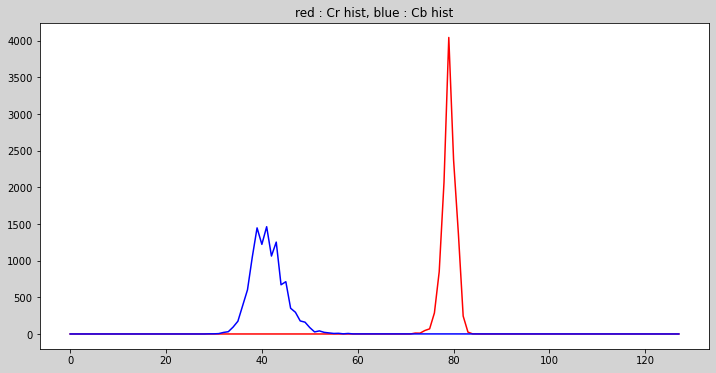

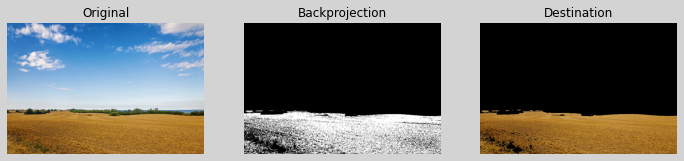

-1

In [7]:
### Practice histogram backprojection
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/cropland.png")

x, y, w, h = cv2.selectROI(source)  # User selected position & size of ROI

source_YCrCb = cv2.cvtColor(source, cv2.COLOR_BGR2YCrCb)
crop = source_YCrCb[y:y+h, x:x+w]  # user selected ROI in YCrCb color space

## constants & arguments declaration
Cr = 1
Cb = 2
channels = [Cr, Cb]  # using except Y in YCrCb

Cr_bins = 128
Cb_bins = 128
histogram_size = [Cr_bins, Cb_bins]  # decrease the all range in half

Cr_range = [0, 256]
Cb_range = [0, 256]
ranges = Cr_range + Cb_range  # set all range in planes

## get histogram of ROI
histogram = cv2.calcHist([crop], channels, None, histogram_size, ranges)

## histogram backproject about all values of input image
backprojection = cv2.calcBackProject([source_YCrCb], channels, histogram, ranges, 1)
destination = cv2.copyTo(source, backprojection)

## pyplot으로 출력
planes = cv2.split(crop)
colors = ["r", "b"]
plt.figure(figsize=(12, 6), facecolor="lightgray")
plt.subplot()
plt.title("red : Cr hist, blue : Cb hist")
for (plane, color_) in zip(planes[1:], colors):
    plane_hist = cv2.calcHist([plane], [0], None, [128], [0, 256])
    plt.plot(plane_hist, color=color_)

## display process and results
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(131, title="Original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(132, title="Backprojection").axis("off")
plt.imshow(backprojection, "gray")

plt.subplot(133, title="Destination").axis("off")
plt.imshow(destination[:, :, ::-1])

plt.show()

## OpenCV 가상 윈도우로 출력 ##
cv2.imshow('Backprojection', backprojection)
cv2.imshow('Histogram', histogram)
cv2.imshow('Destination', destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


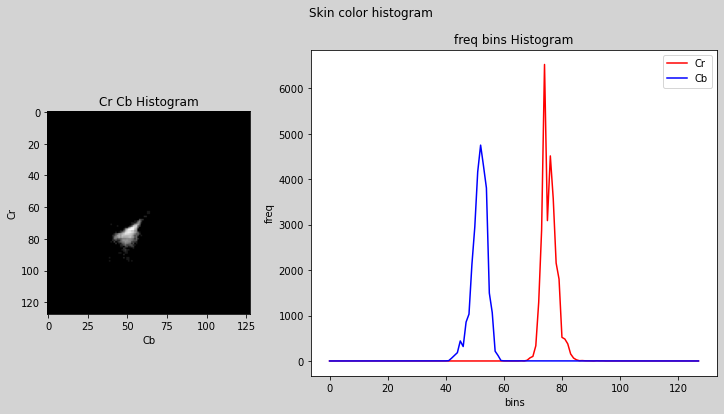

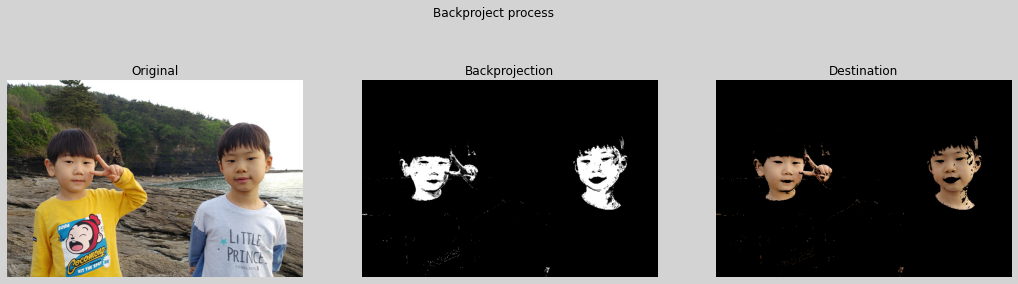

-1

In [8]:
### extract a skin color using histogram backprojection
import cv2
import numpy as np
import matplotlib.pyplot as plt

## reference image for backprojection
reference = cv2.imread("./images/kids1.png")
mask = cv2.imread("./images/kids1_mask.bmp", cv2.IMREAD_GRAYSCALE)
reference_YCrCb = cv2.cvtColor(reference, cv2.COLOR_BGR2YCrCb)

## constants & arguments declaration
Cr = 1
Cb = 2
channels = [Cr, Cb]  # Using except Y in YCrCb

Cr_bins = 128
Cb_bins = 128
histSize = [Cr_bins, Cb_bins]  # Increase to 2 each of the bins size

Cr_range = [0, 256]
Cb_range = [0, 256]
ranges = Cr_range + Cb_range  # Set all range in planes

## get histogram of the region corresponding to the mask image.
hist = cv2.calcHist([reference_YCrCb], channels, mask, histSize, ranges)
hist_norm = cv2.normalize(cv2.log(hist + 1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

## input image for backprojection
source = cv2.imread("./images/kids2.png")
source_YCrCb = cv2.cvtColor(source, cv2.COLOR_BGR2YCrCb)

## histogram backproject about all values of input image
backproj = cv2.calcBackProject([source_YCrCb], channels, hist, ranges, 1)
backproj[backproj <= 45] = 0
destination = cv2.copyTo(source, backproj)

## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray").suptitle("Skin color histogram")
gridspec = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

# Cr Cb histogram
plt.subplot(gridspec[0], title="Cr Cb Histogram")
plt.xlabel("Cb")
plt.ylabel("Cr")
plt.imshow(hist_norm, "gray")

# freq bins histogram
planes = cv2.split(reference_YCrCb)
colors = ["r", "b"]
plt.subplot(gridspec[1], title="freq bins Histogram")
plt.xlabel("bins")
plt.ylabel("freq")
for (plane, color_) in zip(planes[1:], colors):
    plane_hist = cv2.calcHist([plane], [0], mask, [128], [0, 256])
    plt.plot(plane_hist, color=color_, label="C{}".format(color_))
    plt.legend()

plt.show()

# display process and results
plt.figure(figsize=(18, 5), facecolor="lightgray").suptitle("Backproject process")

plt.subplot(131, title="Original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(132, title="Backprojection").axis("off")
plt.imshow(backproj, "gray")

plt.subplot(133, title="Destination").axis("off")
plt.imshow(destination[:, :, ::-1])

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Backprojection", backproj)
cv2.imshow("Destination", destination)
cv2.imshow("Skin color histogram", hist_norm)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 9) Chroma key compositing - 크로마 키 합성
<hr>

- 녹색 또는 파란색 배경에서 촬영한 영상에 다른 배경 영상을 합성하는 기술
    - (e.g.) 반드시 녹색 또는 파란색이 아니어도 된다.
- 구현할 기능(goals)
    - 녹색 스크린 영역 추출하기
    - 녹색 영역에 다른 배경 영상을 합성하여 저장하기
    - 스페이스바를 이용하여 크로마 키 합성 동작 제어하기
<hr>

In [262]:
import sys
import cv2

cap1 = cv2.VideoCapture("./videos/woman.mp4")

if not cap1.isOpened():
    print("Video open failed!")
    sys.exit()

cap2 = cv2.VideoCapture("./videos/raining.mp4")

if not cap2.isOpened():
    print("Video open failed!")
    sys.exit()

w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"w x h = {w} x {h}")
print("frame_cnt1 :", frame_cnt1)
print("frame_cnt2 :", frame_cnt2)

fps = cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)
print(f"fps : {fps}")
print(f"delay : {delay}")

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("./videos/chroma_key.mp4", fourcc, fps, (w, h))

do_composit = False

while(1):
    return1, frame1 = cap1.read()
    
    if not return1:
        break
    
    if do_composit:
        return2, frame2 = cap2.read()
        
        if not return2:
            break
        
        HSV = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(HSV, (50, 150, 0), (80, 255, 255))
        cv2.copyTo(frame2, mask, frame1)
    
    cv2.imshow("frame", frame1)
    out.write(frame1)
    
    key = cv2.waitKey(delay)
    
    if key == ord(" "):
        do_composit = not do_composit
    elif key == 27:
        break

cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

w x h = 1280 x 720
frame_cnt1 : 409
frame_cnt2 : 353
fps : 23.976448433564038
delay : 41


-1